In [1]:
import os
### QAOA_realestate가 있는 폴더로 지정
dir_path = "/Users/minhyeong-gyu/Documents/GitHub/QuantumVariableSelection"
os.chdir(dir_path)
import sys
module_path = dir_path + "/Module"
if module_path not in sys.path:
    sys.path.append(module_path)

from optimizer import optimizer as opt
from optimizer import basefunctions as bf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
# 윈도우 한글 폰트
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# Mac 한글 폰트
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
from dwave.system import LeapHybridCQMSampler
%matplotlib inline

In [2]:
def trim_down(x):
    x= np.asarray(x)
    result = [0.0 if i < 0.0 else i for i in x]
    return result

def trim_up(x):
    x= np.asarray(x)
    result = [1.0 if i > 1.0 else i for i in x]
    return result

def trim(x):
    result = trim_up(trim_down(x))
    return result

In [3]:
from sklearn.utils import check_random_state

In [4]:
# def generate_dependent_sample_logistic(n_samples=500, n_features=10, beta_coef =[4,3,2,2],epsilon=4,covariance_parameter=1, random_state=None):
#     rng = check_random_state(random_state)
#     if n_features < 4:
#         raise ValueError("`n_features` must be >= 4. "
#                             "Got n_features={0}".format(n_features))
#     v = rng.normal(0, 0.4, (n_features, n_features))
#     mean = np.zeros(n_features)
#     cov = v @ v.T*covariance_parameter + 0.1 * np.identity(n_features)
#     X = rng.multivariate_normal(mean, cov, n_samples)
#     n_informative = len(beta_coef)
#     beta = np.hstack((
#         beta_coef, np.zeros(n_features - n_informative)))
#     theta = np.dot(X, beta)
#     theta += -1*np.mean(theta)
#     theta += epsilon * rng.randn(n_samples)
#     prob = (1+np.exp(20*theta/np.max(theta)))**(-1)
#     y = np.array([(np.random.rand()<i)*1.0 for i in prob]).reshape((n_samples,))
#     return X, y

In [182]:
number_influentials = 8
number_features = 40
number_samples = 1000
covariance_parameter = 2
lmbd = 0.02
beta_coef = np.concatenate([np.random.normal(0,20,number_influentials),np.zeros(number_features-number_influentials)])
epsilon = 0
X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
y_type="binary"

In [227]:
n_features=8

In [9]:
sa_mi_heatmap = []
sa_full_heatmap = []
sa_partial_heatmap = []

for i in range(10):
    number_influentials = 8
    number_features = 40
    number_samples = 2000
    covariance_parameter = 100
    lmbd = 0.005
    beta_coef = np.concatenate([np.random.normal(10,1,number_influentials),np.zeros(number_features-number_influentials)])
    epsilon = 0
    X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
    y_type="binary"
    sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
    sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
    sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
    sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
    sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
    sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
    
    sa_mi_heatmap += [sa_mi_result.tolist()]
    sa_full_heatmap += [sa_full_result.tolist()]
    sa_partial_heatmap += [sa_partial_result.tolist()]

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [10]:
heatmap = pd.DataFrame(sa_mi_heatmap+sa_full_heatmap+sa_partial_heatmap)

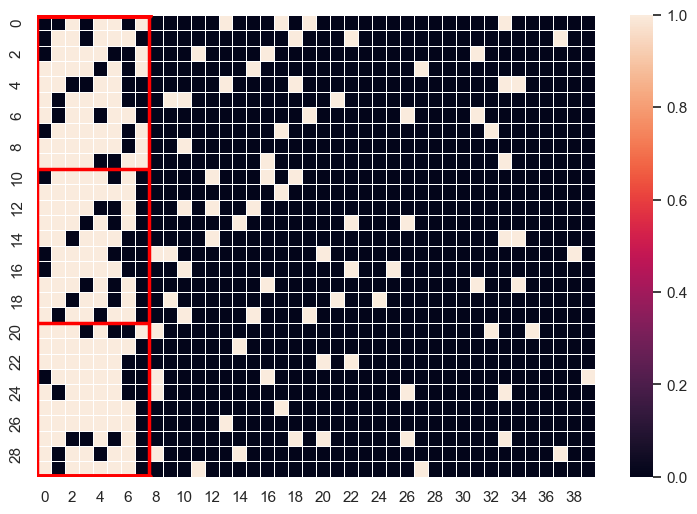

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap,  linewidths=.5, ax=ax)

plt.axvline(number_influentials, 0,3,color="red",linewidth=2.5)
plt.axvline(0, 0, 3,color="red",linewidth=2.5)
plt.axhline(30, 0,number_influentials/40,color="red",linewidth=5)
plt.axhline(20, 0,number_influentials/40,color="red",linewidth=2.5)
plt.axhline(10, 0,number_influentials/40,color="red",linewidth=2.5)
plt.axhline(0, 0,number_influentials/40,color="red",linewidth=5)


In [ ]:
X_mi = X[:,sa_mi_result.astype(bool)]
X_full = X[:,sa_full_result.astype(bool)]
X_partial = X[:,sa_partial_result.astype(bool)]
datasets = [X,X_mi,X_full,X_partial]
Accuracy_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    Accuracy_list += [bf.get_accuracy(dataset,y,0.9)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([Accuracy_list]+[CN_list])
result.index = ["Accuracy","CN"]
result.columns = ["Full","MIC","Corr","Partial Corr"]
result

In [16]:
sa_mi_heatmap = []
sa_full_heatmap = []
sa_partial_heatmap = []
Accuracy_list_total = []
CN_list_total = []
n_features=12
for i in range(10):
    number_influentials = 12
    number_features = 40
    number_samples = 1000
    covariance_parameter = 10
    lmbd = 0.01
    beta_coef = np.concatenate([np.random.normal(10,1,number_influentials),np.zeros(number_features-number_influentials)])
    epsilon = 0
    X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
    y_type="binary"
    sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
    sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
    sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
    sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
    sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
    sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
    
    sa_mi_heatmap += [sa_mi_result.tolist()]
    sa_full_heatmap += [sa_full_result.tolist()]
    sa_partial_heatmap += [sa_partial_result.tolist()]

    X_mi = X[:,sa_mi_result.astype(bool)]
    X_full = X[:,sa_full_result.astype(bool)]
    X_partial = X[:,sa_partial_result.astype(bool)]
    datasets = [X,X_mi,X_full,X_partial]
    Accuracy_list = []
    CN_list = []
    for i in range(4) :
        dataset = datasets[i]
        Accuracy_list += [bf.get_accuracy(dataset,y,0.9)]
        CN_list += [bf.get_CN(dataset)]
    Accuracy_list_total += [Accuracy_list]
    CN_list_total += [CN_list]

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [17]:
heatmap = pd.DataFrame(sa_mi_heatmap+sa_full_heatmap+sa_partial_heatmap)

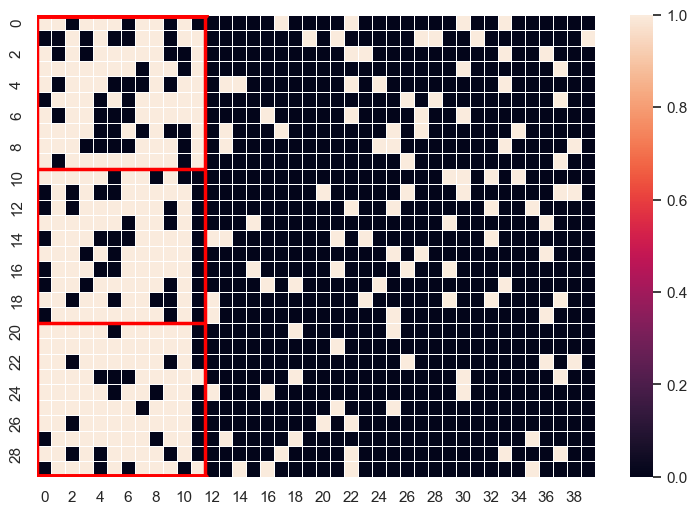

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap,  linewidths=.5, ax=ax)

plt.axvline(number_influentials, 0,3,color="red",linewidth=2.5)
plt.axvline(0, 0, 3,color="red",linewidth=2.5)
plt.axhline(30, 0,number_influentials/40,color="red",linewidth=5)
plt.axhline(20, 0,number_influentials/40,color="red",linewidth=2.5)
plt.axhline(10, 0,number_influentials/40,color="red",linewidth=2.5)
plt.axhline(0, 0,number_influentials/40,color="red",linewidth=5)

In [19]:
sa_mi_heatmap = []
sa_full_heatmap = []
sa_partial_heatmap = []
Accuracy_list_total = []
CN_list_total = []
n_features=None
for i in range(10):
    number_influentials = 12
    number_features = 40
    number_samples = 1000
    covariance_parameter = 10
    lmbd = 0.01
    beta_coef = np.concatenate([np.random.normal(10,1,number_influentials),np.zeros(number_features-number_influentials)])
    epsilon = 0
    X,y = bf.generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
    y_type="binary"
    sa_mi = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="mi")
    sa_mi_result = sa_mi.optimize(X,y,lmbd,reps=10,n_features=n_features)
    sa_full = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="full")
    sa_full_result = sa_full.optimize(X,y,lmbd,reps=10,n_features=n_features)
    sa_partial = opt.SimulatedAnnealing("QUBO",y_type=y_type,measure="partial")
    sa_partial_result = sa_partial.optimize(X,y,lmbd,reps=10,n_features=n_features)
    
    sa_mi_heatmap += [sa_mi_result.tolist()]
    sa_full_heatmap += [sa_full_result.tolist()]
    sa_partial_heatmap += [sa_partial_result.tolist()]

    X_mi = X[:,sa_mi_result.astype(bool)]
    X_full = X[:,sa_full_result.astype(bool)]
    X_partial = X[:,sa_partial_result.astype(bool)]
    datasets = [X,X_mi,X_full,X_partial]
    Accuracy_list = []
    CN_list = []
    for i in range(4) :
        dataset = datasets[i]
        Accuracy_list += [bf.get_accuracy(dataset,y,0.9)]
        CN_list += [bf.get_CN(dataset)]
    Accuracy_list_total += [Accuracy_list]
    CN_list_total += [CN_list]

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [20]:
heatmap = pd.DataFrame(sa_mi_heatmap+sa_full_heatmap+sa_partial_heatmap)

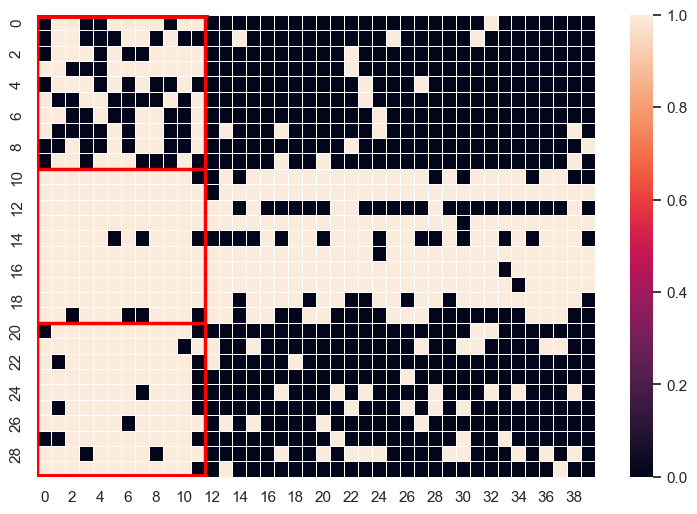

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(heatmap,  linewidths=.5, ax=ax)

plt.axvline(number_influentials, 0,3,color="red",linewidth=2.5)
plt.axvline(0, 0, 3,color="red",linewidth=2.5)
plt.axhline(30, 0,number_influentials/40,color="red",linewidth=5)
plt.axhline(20, 0,number_influentials/40,color="red",linewidth=2.5)
plt.axhline(10, 0,number_influentials/40,color="red",linewidth=2.5)
plt.axhline(0, 0,number_influentials/40,color="red",linewidth=5)

In [160]:
def generate_dependent_sample_logistic(n_samples=500, n_features=10, beta_coef =[4,3,2,2],epsilon=4,covariance_parameter=1, random_state=None):
    rng = check_random_state(random_state)
    if n_features < 4:
        raise ValueError("`n_features` must be >= 4. "
                            "Got n_features={0}".format(n_features))
    v = rng.normal(0, 0.4, (n_features, n_features))
    mean = np.zeros(n_features)
    cov = v @ v.T*covariance_parameter + 0.1 * np.identity(n_features)
    X = rng.multivariate_normal(mean, cov, n_samples)
    n_informative = len(beta_coef)
    beta = np.hstack((
        beta_coef, np.zeros(n_features - n_informative)))
    theta = np.dot(X, beta)
    theta += -1*np.mean(theta)
    theta += epsilon * rng.randn(n_samples)
    prob = (1+np.exp(4+20*theta/np.max(theta)))**(-1)
    y = np.array([(np.random.rand()<i)*1.0 for i in prob]).reshape((n_samples,))
    return X, y

In [167]:
number_influentials =4
number_features = 40
number_samples = 1000
covariance_parameter = 100
beta_coef = np.concatenate([np.random.normal(10,2,number_influentials),np.zeros(number_features-number_influentials)])
epsilon = 0
X,y = generate_dependent_sample_logistic(number_samples,number_features,beta_coef,covariance_parameter=covariance_parameter,epsilon=epsilon)
y_type="binary"
true_index = np.array([True for i in range(number_influentials)]+[False for i in range(number_features-number_influentials)])
random_index1 = np.random.randint(2,size=number_features).astype(bool)
random_index2 = np.array([True for i in range(number_influentials)] + np.random.randint(2,size=number_features-number_influentials).astype(bool).tolist())
X_true = X[:,true_index]
X_random1 = X[:,random_index1]
X_random2 = X[:,random_index2]
datasets = [X,X_true,X_random1,X_random2]
Accuracy_list = []
CN_list = []
for i in range(4) :
    dataset = datasets[i]
    Accuracy_list += [bf.get_accuracy(dataset,y,0.9)]
    CN_list += [bf.get_CN(dataset)]
result = pd.DataFrame([Accuracy_list]+[CN_list])
result.index = ["Accuracy","CN"]
result.columns = ["Full","True","Random","True+Random"]
result

/Users/minhyeong-gyu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Full      True    Random  True+Random
Accuracy    0.900000  0.930000  0.880000     0.970000
CN        119.283498  1.623959  4.546807     3.425549

In [168]:
sum(y)/len(y)

0.253